# Configuration des consignes en fonction des points de ventes

Société PICKUP SERVCIES

# Problématique : 
Proposer une configuration de la consigne en fonction des colis arrivant à un point!

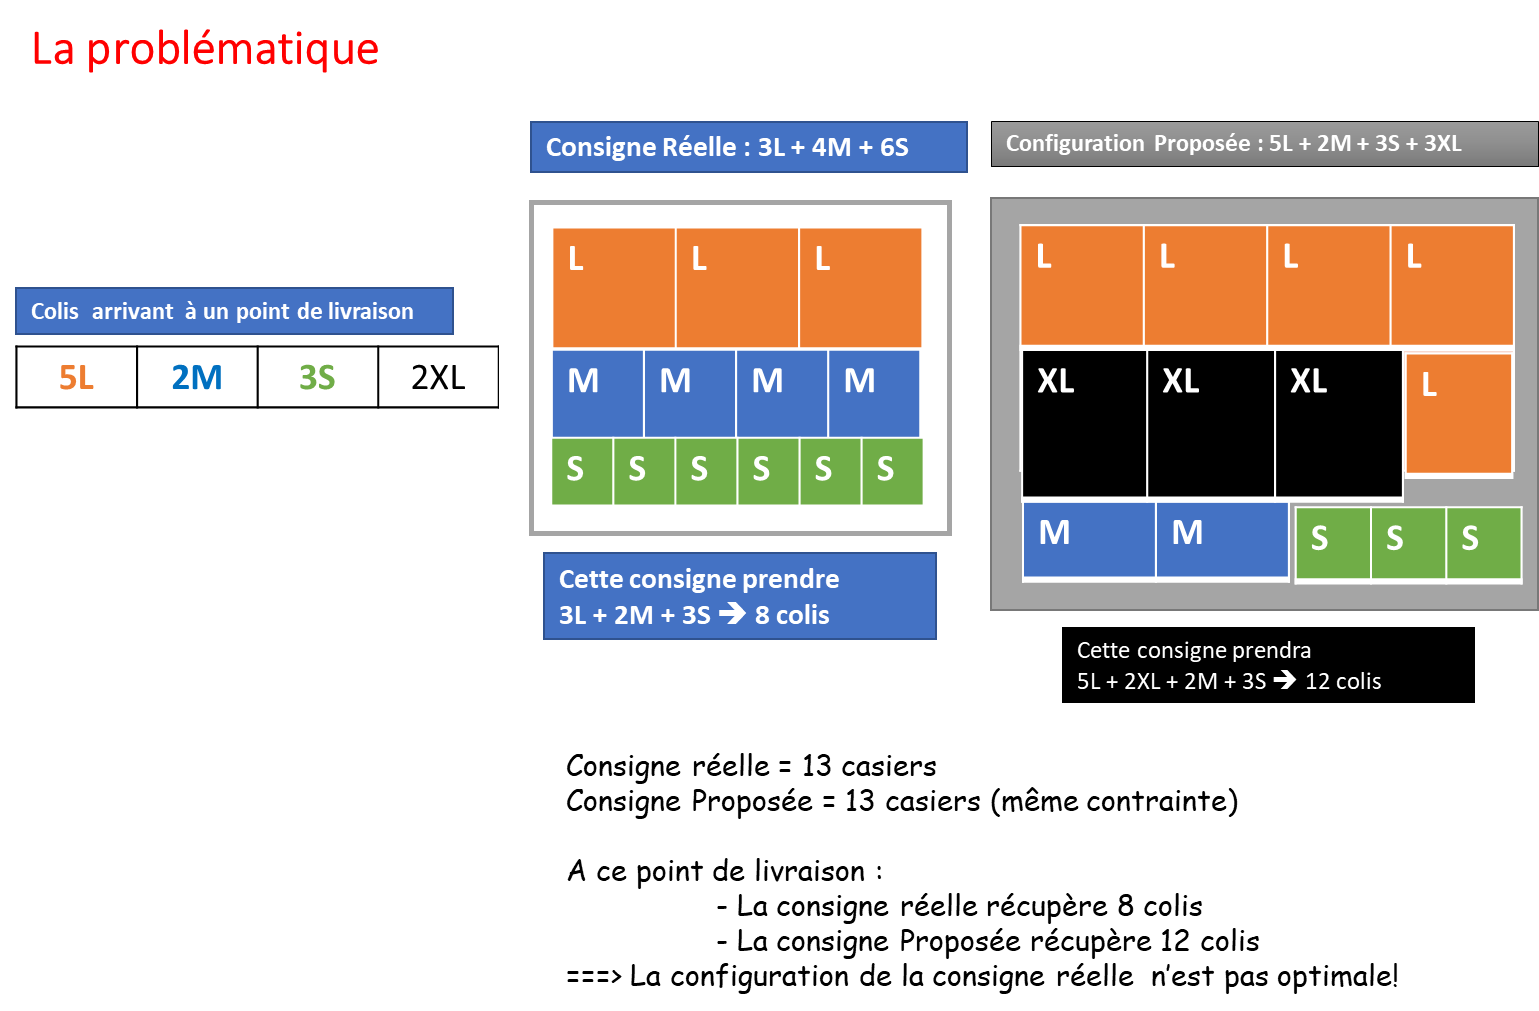

In [1]:
import PIL.Image
probleme = PIL.Image.open("C:\\Users\\talko & ko\Pictures\\la problematique.png")
display(probleme)

            Configurer une consigne consiste à rassembler différentes tailles de casiers pour la dite consigne.
            Les critères  de la taille des colis et taille casiers sont donc  pris en compte  durant toute l'étude, 
            
            L'illustration ci-dessous nous démontre bien que la configuration de la consigne à l'origine influence le 
            nombre de colis que peut réceptionner la consigne. C'est juste ce paramètre que nous essayerons de lever ici.
            
            Ceci permettra en effet pour un futur déploiement de consigne d'attribuer une configuration "optimale".
            
            il S'agit donc de comparer le nombre de colis, arrivant à un point de distribution par le nombre  des casiers
            disponibles en consigne pouvant recevoir ses colis
            
        

# Comment s'y prendre ?

### METHODE 1 : Prediction des Tailles de colis  + Algorithme optimisation

     Toute chose égale par ailleurs : 
     
     Nous commencerons par éviter Certaines "réalités métiers" afin de rendre moins complexe l'algorithme. De ce fait,
     à partir de l'historique des colis arrivant à un point nous déduirons la configuration  générale de ces
     colis  que nous comparerons à la configuration de la consigne de ce même point :
   
     Nous finirons en élaborant  à l'aide de FLASK, une application en ligne.
     
     Les Données et process de mise en place du modèle :
     ----------------------------------------------------
             0- PREDICTION DES TAILLES DE COLIS :
             Le fichier PCT_status nous permet de réaliser la prédiction de la taille des colis en fonction  de
             leurs dimensions
             
             1- DEDUCTION DE LA CONFIGURATION DES COLIS ARRIVANT A UN POINT :
             le nombre de colis arrivant ou detinés à un point (relais colocalisé ou consigne autonome) nous est donné
             par  le fichier (qv092) ==> filtrage sur Pudo_cible
             
             2-Etude de la CONFIGURATION DES COLIS EN CONSIGNE :
             Le nombre de colis effecivement en consigne ==> (qv092) filtrage sur pudo_reel et aussi ==>fichier etat_parc
             
             3-PROPOSER UNE CONFIGURATION :
             Proposer une configuration en fonction de la moyenne du type des colis destinés à un point o via une
             regression (pas besoin)
             
             4-COMPARAISON DES TAUX DE REMPLISSAGE (Plus tard):
             Comparer cette configuration avec un remplissage de la consigne reelle (voir si % occupation meilleure) ?
             
             5- @WEB_APP!

## Approche métiers amoindries

            Afin de simplifier notre entendement et l'algorithme nous considèrerons que pour tous les colis arrivant à 
            un point (coloc ou autonome), ceux qui ne rentrent pas en consigne c'est pour faute configuration  de la
            consigne en d'autres termes (plus de casiers disponibles de la dite taille) 
            
            Nous considérerons aussi qu'un colis de taille M ne sera pas mis dans dans un casier de taille L même si cela
            est possible et se fait pratiquement LOL.
            
           NB :  Il est necessaire d'avoir une meilleire connaissance métier afin de produire une extraction de 
           données permettant une modélisation plus ROBUSTE ainsi qu'une estimation du nombre de casiers lors de 
           la configuration de la consigne.

## DOSSIERS DE TRAVAIL 

In [2]:
import os 
# Positionnement dans le dossier du projet
project_folder = "D:\FRANCE 20 MAI 2018\DATA SCIENCES\FULLSTACK_PROJECT\ATK"
project = os.chdir(project_folder)
project_final = os.listdir(project)
# project_final

# tout le dossier etat du parc 
dossier_etat_parc ="D:\FRANCE 20 MAI 2018\DATA SCIENCES\FULLSTACK_PROJECT\ATK\ATK2\ETAT PARC"
tous_fichiers = os.listdir(dossier_etat_parc)
print("Tous les fichiers du dossier  etat_parc", len(tous_fichiers))

#Fichier PCT
dosser_pct = "D:\FRANCE 20 MAI 2018\DATA SCIENCES\FULLSTACK_PROJECT\ATK\ATK3"
pct_files = os.listdir(dosser_pct)
print("Tous les fichiers du dossier pct", len(pct_files))

Tous les fichiers du dossier  etat_parc 1680
Tous les fichiers du dossier pct 6


# 1- PREDICTION TAILLE DES COLIS 

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## a)- Selection et lecture des fichiers PCT

In [4]:
# Selection uniquement les ficiers PCT
A = [file for file in os.listdir(dosser_pct) if file.startswith("Packcity_Status")]
print("les fichiers qui nous intéressent PCT", len(A))
print("exemple : ", A[0])

les fichiers qui nous intéressent PCT 6
exemple :  Packcity_Status-report_0211_1511.csv


In [5]:
#combinons tous les fichiers en un
for i, x in enumerate(A) :
    if i == 0 :
        k = pd.read_csv("D:\\FRANCE 20 MAI 2018\\DATA SCIENCES\\FULLSTACK_PROJECT\\ATK\\ATK3\\" + x, sep=";")
        #print(k.shape)
      
    else  :
        k1 = pd.read_csv("D:\\FRANCE 20 MAI 2018\\DATA SCIENCES\\FULLSTACK_PROJECT\\ATK\\ATK3\\" + x, sep=";")
        #print(k1.shape) 
        k = k.append(k1, ignore_index = True) # continuer l'indexation
#k.shape
print("Nombre de lignes :", k.shape[0], "\nNombre de colonnes : ", k.shape[1])
print("\nLes différentes colonnes : ", "\n", k.columns)
k.head(3)

Nombre de lignes : 390000 
Nombre de colonnes :  14

Les différentes colonnes :  
 Index(['Nº colis', 'Nº casier', 'Taille de casier', 'Nº machine', 'Poids',
       'Longueur', 'Hauteur', 'Largeur', 'Nom d'expéditeur',
       'Famille d'evenement', 'Libelle evenement', 'Login utilisateur', 'Date',
       'Heure d'evenement'],
      dtype='object')


,Nº colis,Nº casier,Taille de casier,Nº machine,Poids,Longueur,Hauteur,Largeur,Nom d'expéditeur,Famille d'evenement,Libelle evenement,Login utilisateur,Date,Heure d'evenement
0,01045128292105,NaN,NaN,PCG20006,"2,15",47,21,29,NaN,Annonce,Expédition annoncée,NaN,02/11/2020,11:55:13
1,01045128292105,NaN,NaN,PCG20006,"2,15",47,21,29,NaN,Annonce,Expédition mise à jour,NaN,02/11/2020,13:25:18
2,01045130374576,NaN,NaN,PCG20039,"0,00",0,0,0,NaN,Annonce,Expédition annoncée,NaN,14/11/2020,12:30:46


## b) - Elaboration du Dataset 

In [6]:
# Notre variable cible ayant des valeurs absentes nous allons simplement les déduire du dataset
k.isnull().sum()
k = k.dropna(subset = ["Taille de casier", 'Nº casier'])
print("Nombre de lignes :", k.shape[0], "\nNombre de colonnes : ", k.shape[1])
print("Les tailles de casiers répertoriées :", k["Taille de casier"].unique())

Nombre de lignes : 149455 
Nombre de colonnes :  14
Les tailles de casiers répertoriées : ['S' 'M' 'XS' 'L']


In [7]:
#posons
dataset = k.copy()
dataset = k.loc[:, ['Date','Nº colis', 'Nº machine', 'Poids',
       'Longueur', 'Hauteur', 'Largeur', 'Taille de casier' ]].reset_index()
dataset.drop("index", axis =1, inplace = True)
dataset= dataset.drop_duplicates(subset = ["Nº colis"])
dataset.set_index("Nº colis", inplace = True)
dataset.index.name = None
print(dataset.shape)
#dataset.head()

(75286, 7)


In [8]:
# Nous avons des colis où le poids est nul et les dmensions = 0 ou 1, supprimons ces colis
len(dataset[dataset["Poids"] == "0,00"])
dataset = dataset[dataset["Poids"] != "0,00"]
dataset["Poids"] = dataset["Poids"].str.strip().str.replace(",", ".").astype(float)
print(dataset.shape)
dataset.head()

(74418, 7)


,Date,Nº machine,Poids,Longueur,Hauteur,Largeur,Taille de casier
5Y00033950334,13/11/2020,PCG20051,0.28,24,8,21,XS
6A03366872014,02/11/2020,PCG20074,0.38,19,5,19,S
6A05253929184,05/11/2020,PCG00195,2.62,35,16,30,M
6A12772776335,10/11/2020,PCG00331,1.64,33,7,22,M
6A13164447208,10/11/2020,PCG00434,1.58,0,0,0,M


In [9]:
dataset.groupby("Taille de casier").count()

,Date,Nº machine,Poids,Longueur,Hauteur,Largeur
Taille de casier,,,,,,
L,12559,12559,12559,12559,12559,12559
M,41534,41534,41534,41534,41534,41534
S,17581,17581,17581,17581,17581,17581
XS,2744,2744,2744,2744,2744,2744


## c) - Le modele de classification 

In [10]:
#Features and target 
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

# split dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###   XGBOOST

In [11]:
from xgboost import XGBClassifier
X_clf = XGBClassifier()
X_clf.fit(X_train, y_train)

C:\intallAnaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:35:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Confusion matrix and accuracy


Niveau de precision 81.77%
Score_train: 83.44% 
Score_test :81.77%


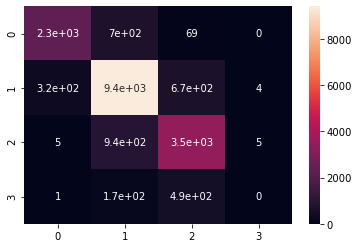

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = X_clf.predict(X_test)
print("\nNiveau de precision {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Score_train: {:.2f}%".format(X_clf.score(X_train, y_train)*100),
      "\nScore_test :{:.2f}%".format(X_clf.score(X_test, y_test)*100 ))

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True)
plt.show()

In [13]:
la_matrice1 =pd.DataFrame(cm)
print("True Positive", 2341+9410+3462+0)
la_matrice1.head()

True Positive 15213


,0,1,2,3
0,2341,703,69,0
1,324,9410,671,4
2,5,944,3462,5
3,1,174,492,0


##### K-fold Cross validation

In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = X_clf, X= X_train, y = y_train, cv = 10)
print("Accuracy moyen  : {:.2f} %".format(accuracies.mean()*100))
print("Standard_Deviation OU ERREUR : {:.2f} %".format(accuracies.std()*100))

C:\intallAnaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:36:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

### kernel SVM ===> model non entrainé car demande trop de ressources à essayer + tard

## Try LogisticRegression

In [15]:
#Features and target 
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

# split dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
Log_clf = LogisticRegression(random_state = 0)
Log_clf.fit(X_train, y_train)

LogisticRegression(random_state=0)


Niveau de precision 81.77%
Score_train: 75.98% 
Score_test :75.95%


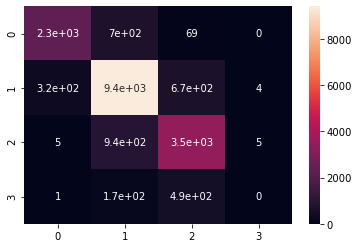

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = X_clf.predict(X_test)

print("\nNiveau de precision {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Score_train: {:.2f}%".format(Log_clf.score(X_train, y_train)*100),
      "\nScore_test :{:.2f}%".format(Log_clf.score(X_test, y_test)*100 ))

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True)
plt.show()

In [18]:
la_matrice =pd.DataFrame(cm)
print("True Positive", 2341+9410+3462+0)
la_matrice.head()

True Positive 15213


,0,1,2,3
0,2341,703,69,0
1,324,9410,671,4
2,5,944,3462,5
3,1,174,492,0


In [19]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Log_clf, X= X_train, y = y_train, cv = 10)
print("Accuracy moyen  : {:.2f} %".format(accuracies.mean()*100))
print("Standard_Deviation OU ERREUR : {:.2f} %".format(accuracies.std()*100))

Accuracy moyen  : 75.99 %
Standard_Deviation OU ERREUR : 0.52 %


# 3- ETUDE CONFIGURATION DES CONSIGNES ET COLIS EN CONSIGNE

### Lecture du dossier  Etat du parc

In [20]:
# Selection uniquement les ficiers Etat2parc
A = [file for file in os.listdir(dossier_etat_parc) if file.startswith("Etat2")]
print("les fichiers qui nous intéressent etat2parc", len(A))
print("exemple : ", A[0])

les fichiers qui nous intéressent etat2parc 1548
exemple :  Etat2Parchoraire_20200901000001.csv


In [21]:
os.chdir(dossier_etat_parc)

### Aperçu d'un seul fichier

In [22]:
etat_parc = pd.read_csv("Etat2Parchoraire_20201011040001.csv", sep= ";")
print("Lignes et colonnes :", etat_parc.shape)

# Afficher toutes les colonnes
from IPython.display import display 
pd.options.display.max_columns = None 
display(etat_parc.head(2)) 

Lignes et colonnes : (404, 31)


,Nº transporteur,Nom du site,Code postal,Ville,Nb casiers,Total Casiers Disponibles,Total Casiers Indisponibles,Taux occupation Total,Casiers XS disponibles,Casiers S disponibles,Casiers M disponibles,Casiers L disponibles,Casiers XL disponibles,Casiers SXS disponibles,Casiers SM disponibles,Casiers SL disponibles,Casiers XXL disponibles,Taux occupation XS,Taux occupation S,Taux occupation M,Taux occupation L,Taux occupation XL,Taux occupation SXS,Taux occupation SM,Taux occupation SL,Taux occupation XXL,Colis livrés,Colis à collecter,Casiers en Panne,Casiers Sales,Casiers Ouverts
0,X0001,Packcity DEMO,75015,PARIS,28,21,7,"25,00 %",0,6,13,2,0,0,0,0,0,"0,00 %","40,00 %","7,14 %","50,00 %","0,00 %","0,00 %","0,00 %","0,00 %","0,00 %",0,0,5,0,0
1,FR56079,Leroy Merlin - L'appart Batignolles,75017,PARIS,84,59,25,"29,76 %",0,27,12,19,1,0,0,0,0,"0,00 %","15,63 %","55,56 %","17,39 %","50,00 %","0,00 %","0,00 %","0,00 %","0,00 %",16,0,2,0,0


   #### CE FICHIER NOUS RENSEIGNE SUR :
        - l'etat des casiers  des 404 consignes distinctes le même jour et à une heure donnée
        - Colis livrés dans la consigne à cette date (ici pour exemple 2020/10/11)
        -casiers disponibles  et indisponible par consigne
        - taux d'occupation de la consigne ainsi que le taux d'occupatin par type de casiers
        - Les Casiers en panne, sales et ouverts

## Concatenate all files + Nettoyage du fichier Global

Prenons cette fois-ci tous les fichiers etat_parc

In [23]:
#combinons tous les fichiers etat parc en un
for i, x in enumerate(A) :
    if i == 0 :
        k = pd.read_csv("D:\\FRANCE 20 MAI 2018\\DATA SCIENCES\\FULLSTACK_PROJECT\\ATK\\ATK2\\ETAT PARC\\" + x, sep=";")
        k["Date"] = x[17:-10]  # insertion de la date dans le fichier
        #k = pd.DataFrame(k.iloc[2, :]).T  # Pour choisir une seule consigne à chaque fois dans les 404
    elif i == 1547 :
        break
    else  :
        k1 = pd.read_csv("D:\\FRANCE 20 MAI 2018\\DATA SCIENCES\\FULLSTACK_PROJECT\\ATK\\ATK2\\ETAT PARC\\" + x, sep=";")
        k1["Date"] = x[17:-10]
        #k1 = pd.DataFrame(k1.iloc[2, :]).T
        #print(k1.shape) 
        k = k.append(k1, ignore_index = True) # continuer l'indexation
#k.shape
print("Nombre de lignes :", k.shape[0], "\nNombre de colonnes : ", k.shape[1])

# posons 
etat_parc = k
print("Nombre de lignes du fichier : ", etat_parc.shape[0])
print("Nb de consignes unique detectées :", etat_parc["Nº transporteur"].nunique())
etat_parc.head(3)

Nombre de lignes : 625762 
Nombre de colonnes :  32
Nombre de lignes du fichier :  625762
Nb de consignes unique detectées : 520


,Nº transporteur,Nom du site,Code postal,Ville,Nb casiers,Total Casiers Disponibles,Total Casiers Indisponibles,Taux occupation Total,Casiers XS disponibles,Casiers S disponibles,Casiers M disponibles,Casiers L disponibles,Casiers XL disponibles,Casiers SXS disponibles,Casiers SM disponibles,Casiers SL disponibles,Casiers XXL disponibles,Taux occupation XS,Taux occupation S,Taux occupation M,Taux occupation L,Taux occupation XL,Taux occupation SXS,Taux occupation SM,Taux occupation SL,Taux occupation XXL,Colis livrés,Colis à collecter,Casiers en Panne,Casiers Sales,Casiers Ouverts,Date
0,FR56079,Leroy Merlin - L'appart Batignolles,75017,PARIS,84,61,23,"27,38 %",0,30,14,16,1,0,0,0,0,"0,00 %","6,25 %","48,15 %","30,43 %","50,00 %","0,00 %","0,00 %","0,00 %","0,00 %",13,5,1,0,0,20200901
1,X0262,Carrefour Market Saint Ouen,75018,Paris,107,90,17,"15,89 %",19,24,41,6,0,0,0,0,0,"5,00 %","20,00 %","14,58 %","33,33 %","0,00 %","0,00 %","0,00 %","0,00 %","0,00 %",5,9,3,0,0,20200901
2,X0006,GARE DE PLAISIR GRIGNON,78370,PLAISIR,65,54,11,"16,92 %",0,8,38,8,0,0,0,0,0,"0,00 %","33,33 %","5,00 %","38,46 %","0,00 %","0,00 %","0,00 %","0,00 %","0,00 %",7,2,2,0,0,20200901


In [24]:
etat_parc = etat_parc.copy()

##### Gestion de la colonne N° transporteur == id_consigne

In [25]:
#VERIFICATION DES CODES PUDO
print("VERIFICATION DES CODES PUDO")
etat_parc["Nº transporteur"] =etat_parc["Nº transporteur"].str.strip()

pus_long = [x for x in etat_parc["Nº transporteur"] if len(x) >= 7]
pus_P = [x for x in etat_parc["Nº transporteur"] if len(x) >=7 and x.startswith("P")]
pus_X = [x for x in etat_parc["Nº transporteur"] if len(x) >= 7 and x.startswith("X")]
pus_f = [x for x in etat_parc["Nº transporteur"] if len(x) > 7 and x.startswith("F")]
pus_0 = [x for x in etat_parc["Nº transporteur"] if len(x) >= 7 and x.startswith("0")]
pus_x_x = [x for x in etat_parc["Nº transporteur"] if len(x) >= 7 and x.startswith("X") or x.startswith("P")]
pus_consigne = [x for x in etat_parc["Nº transporteur"] if len(x) >= 7 and x.startswith("consigne")]

print( "\nCode consigne plus que X0000 :", len(pus_long),  "\nCode long plus que X0000 et commençant par P :", len(pus_P),
      "\nCode consigne plus que X0000 et commençant par X :",len(pus_X),  
      "\nCode consigne plus que X0000 et commençant par F :", len(pus_f),
      "\nCode consigne plus que X0000 et commençant par 0 :", len(pus_0),
       "\nCode consigne  plus que X0000 et commençant par X et P:", len(pus_x_x),
     "\nCode consigne plus que X0000 et commençant par consigne :", len(pus_consigne))


VERIFICATION DES CODES PUDO

Code consigne plus que X0000 : 313567 
Code long plus que X0000 et commençant par P : 46898 
Code consigne plus que X0000 et commençant par X : 108795 
Code consigne plus que X0000 et commençant par F : 941 
Code consigne plus que X0000 et commençant par 0 : 914 
Code consigne  plus que X0000 et commençant par X et P: 155693 
Code consigne plus que X0000 et commençant par consigne : 0


#### fonction lambda x appliquée à la colonne 

In [26]:
etat_parc["Nº transporteur"] = etat_parc["Nº transporteur"].apply(lambda x : 
                                                                  x[:5] if len(x) > 7 and x.startswith("X") else x)

etat_parc["Nº transporteur"] = etat_parc["Nº transporteur"].apply(lambda x : 
                                                                  x[9:] if len(x) > 7 and x.startswith("P") else x)

etat_parc["Nº transporteur"] = etat_parc["Nº transporteur"].apply(lambda x :
                                                                  x[7:12] if len(x) > 7 and x.startswith("0") else x)


etat_parc["Nº transporteur"] = etat_parc["Nº transporteur"].apply(lambda x :
                                                                  x[:7] if len(x) > 7 and x.startswith("F") else x)

etat_parc["Nº transporteur"] = etat_parc["Nº transporteur"].apply(lambda x : 
                                                                  x[:5] if len(x) > 7 and x.startswith("X") else x)

etat_parc["Nº transporteur"] = etat_parc["Nº transporteur"].apply(lambda x :
                                                                  x[9:] if len(x) > 7 and x.startswith("consigne") else x)
                                                                        
print("Nb PUDO unique :", etat_parc["Nº transporteur"].nunique())

Nb PUDO unique : 415


In [27]:
[x for x in etat_parc["Nº transporteur"] if  len(x) > 7 ]

[]

   ##  Type_casiers ou taille_casiers

In [28]:
consigne = etat_parc.loc[:, ["Date", "Nº transporteur", "Nom du site", 'Nb casiers',
       'Total Casiers Disponibles', 'Total Casiers Indisponibles',
       'Taux occupation Total', 'Casiers XS disponibles',
       'Casiers S disponibles', 'Casiers M disponibles',
       'Casiers L disponibles', 'Casiers XL disponibles',
       'Casiers SXS disponibles', 'Casiers SM disponibles',
       'Casiers SL disponibles', 'Casiers XXL disponibles',
       'Taux occupation XS', 'Taux occupation S', 'Taux occupation M',
       'Taux occupation L', 'Taux occupation XL', 'Taux occupation SXS',
       'Taux occupation SM', 'Taux occupation SL', 'Taux occupation XXL',
       'Colis livrés', 'Colis à collecter', 'Casiers en Panne',
       'Casiers Sales', 'Casiers Ouverts']]

# ==> SELECTION DES COLONNES EN %
colonne_pourcentage = [x for x in consigne.columns if x.startswith("Taux occup")]
#print("Nombre de colonnes en % = ",  len(colonne_pourcentage))
#print(colonne_pourcentage)

# ===> CONVERSION EN FLOAT LES COLONNES EN %
for i in colonne_pourcentage :
    consigne[i] = consigne[i].str[:-1].str.strip().str.replace(',', '.').astype(float)
    consigne[i] = round(consigne[i], 2)
#print(consigne.dtypes)

# ===> LES TYPES DES CASIERS 
types_casiers = [x for x in consigne.columns if  x.endswith (" disponibles")]
taille_casiers = [i[8:-11].strip().replace(" ", "_") for i in types_casiers]
print("Les différentes tailles de casiers :", taille_casiers)

Les différentes tailles de casiers : ['XS', 'S', 'M', 'L', 'XL', 'SXS', 'SM', 'SL', 'XXL']


### Calcul du  nombre de casiers par type

    Nb casiers = Total Casiers Disponibles  + Total Casiers Indisponibles 
    taux_occupation_total  =  Total Casiers Indisponibles / Nb casiers

    Nb_casiers = Casiers XS + Casiers M + Casiers L +Casiers XL + Casiers SXS + 
                 Casiers SM + Casiers SL + Casiers XXL disponibles
    taux_occ_casier_x = casier_x_indispo / total_casier_x
    total_casier_x = casier_x_dispo + casier_x_indispo
    ==> taux_occ_casier_x = (total_casier_x - casier_x_dispo) / total_casiers_x

        ==> soit que :  total_casiers_x = casier_x_dispo / (1-taux_occ_casier_x)
    exemple : 
    Casiers S disponibles  = 6
    Taux occupation S  =  40%
    nb_casier_s = 6 / (1-40%) = 10

####  Le calcul

In [29]:
# RENAME COLUMNS
consigne = consigne.rename(columns = {
    
       "Nº transporteur" : "id_consigne",
      'Casiers XS disponibles' : "casiers_dispo_XS",
       'Casiers S disponibles': "casiers_dispo_S", 
       'Casiers M disponibles' : "casiers_dispo_M",
       'Casiers L disponibles' : "casiers_dispo_L", 
        'Casiers XL disponibles' : "casiers_dispo_XL",
       'Casiers SXS disponibles' :"casiers_dispo_SXS", 
        'Casiers SM disponibles' : "casiers_dispo_SM",
       'Casiers SL disponibles' : "casiers_dispo_SL", 
        'Casiers XXL disponibles' : "casiers_dispo_XXL",
    
       'Taux occupation Total' : "Tx_occp_total",                               
       'Taux occupation XS' : "Tx_occp_XS", 
      'Taux occupation S' : "Tx_occp_S", 
       'Taux occupation M' : "Tx_occp_M",
       'Taux occupation L': "Tx_occp_L",
       'Taux occupation XL' : "Tx_occp_XL",
       'Taux occupation SXS' : "Tx_occp_SXS",
       'Taux occupation SM': "Tx_occp_SM", 
       'Taux occupation SL': "Tx_occp_SL", 
       'Taux occupation XXL' : "Tx_occp_XXL" })
consigne["Date"] = pd.to_datetime(consigne["Date"])

In [30]:
# ==> CALCUL DU NOMBRE DE CASIERS PAR TYPES POUR CHAQUE CONSIGNE
for i in taille_casiers :
    consigne["Casiers_{}".format(i)] =  consigne["casiers_dispo_{}".format(i)] / (1-consigne["Tx_occp_{}".format(i)]/100)
    consigne["Casiers_{}".format(i)] = consigne["Casiers_{}".format(i)].astype(float)
    consigne["Casiers_{}".format(i)] = round(consigne["Casiers_{}".format(i)],0)

# ==> SELECTION DES COLONNES UTILES POUR CONFIGURER UNE CONSIGNE 
configuration = consigne.loc[:, ['id_consigne',"Nom du site",'Nb casiers', 'Casiers_XS',
       'Casiers_S', 'Casiers_M', 'Casiers_L', 'Casiers_XL', 'Casiers_SXS',
       'Casiers_SM', 'Casiers_SL', 'Casiers_XXL']]
print("Nombre de consignes distinctes :", configuration["id_consigne"].nunique())

# ==> SELECTION DES CASIERS EN OMETTANT LES CASIERS QUI NE TRAVALLENT PAS (contexte connaissance métier)
config_consigne = consigne.loc[:, ["Date",'id_consigne',"Nom du site",  'Nb casiers',
       'Casiers_S', 'Casiers_M', 'Casiers_L', 'Casiers_XL']]
print("CONFIG_CONSIGNE  contient {} lignes:".format(config_consigne.shape[0]),
      "{} colonnes".format(config_consigne.shape[1]))

Nombre de consignes distinctes : 415
CONFIG_CONSIGNE  contient 625762 lignes: 8 colonnes


# LA CONFIGURATION DES CONSIGNES

In [31]:
 #config_consigne["Date"] = pd.to_datetime(config_consigne["Date"])
print("Nous ne retiendrons pas toutes les tailles de consignes ==> Connaissance métiers")
config_consigne.head()

Nous ne retiendrons pas toutes les tailles de consignes ==> Connaissance métiers


,Date,id_consigne,Nom du site,Nb casiers,Casiers_S,Casiers_M,Casiers_L,Casiers_XL
0,2020-09-01,FR56079,Leroy Merlin - L'appart Batignolles,84,32.0,27.0,23.0,2.0
1,2020-09-01,X0262,Carrefour Market Saint Ouen,107,30.0,48.0,9.0,0.0
2,2020-09-01,X0006,GARE DE PLAISIR GRIGNON,65,12.0,40.0,13.0,0.0
3,2020-09-01,X0005,GARE DE MASSY PALAISEAU,65,20.0,28.0,17.0,0.0
4,2020-09-01,X0007,GARE DE TOURNAN,65,12.0,40.0,13.0,0.0


### DEDUCTION DU NOMBRE DE COLIS EN CONSIGNE PAR TAILLE DE COLIS

    NOTONS BIEN QUE LE NOMBRE DE COLIS EN CONSIGNES A UNE DATE T EST DIFFERENTE DES COLIS LIVRES A CETTE DATE
    
    COLIS_EN_CONSIGNE_TODAY = COLIS LIVRES_TODAY + COLIS_EN_CONSIGNE_HIER
    
    Ainsi pour une taille de colis donnée x:
    taux_occ_casier_x = Nb_colis_casiers_x / Nb_casiers_x
    ===> Nb_colis_casiers_x = taux_occ_casier_x * Nb_casiers_x
  
    Exemple : pour la consigne "X0001"
    casiers_s disponibles = 6
    Taux occupation S  =  40%
    nb_casier_s = 6 / (1-40%) = 10 (déjà démontré plus haut)
    => Nb_colis_dans_casier_S = 40% * 10 = 4  (à cette date 2020/10/11)
  
    ==> Ainsi nous pouvons avoir comme une photo de l'occupation des consignes par types de colis. Ce procédé devra se faire pour une historique de ce fichier afin d'avoir de la matière à travailler

In [32]:
for i in taille_casiers :
    consigne["Nb_colis_{}".format(i)] = (consigne["Tx_occp_{}".format(i)]/100) *consigne["Casiers_{}".format(i)]
    consigne["Nb_colis_{}".format(i)] = consigne["Nb_colis_{}".format(i)].astype(float)
    consigne["Nb_colis_{}".format(i)] = round(  consigne["Nb_colis_{}".format(i)],0)
    
Taille_colis_en_consigne = consigne.loc[:, ['Date', 'id_consigne', 'Nom du site', 'Nb casiers', "Colis livrés",
                                        'Total Casiers Indisponibles','Tx_occp_total',
                                            'Casiers_S', 'Casiers_M', 'Casiers_L', 'Casiers_XL',
                                       'Nb_colis_S', 'Nb_colis_M', 'Nb_colis_L', 'Nb_colis_XL',
                                           'Casiers en Panne', 'Casiers Sales', 'Casiers Ouverts']]


# COLIS EN CONSIGNE PAR TAILLE DE COLIS

In [33]:
Taille_colis_en_consigne = Taille_colis_en_consigne.dropna()
Taille_colis_en_consigne.head()

,Date,id_consigne,Nom du site,Nb casiers,Colis livrés,Total Casiers Indisponibles,Tx_occp_total,Casiers_S,Casiers_M,Casiers_L,Casiers_XL,Nb_colis_S,Nb_colis_M,Nb_colis_L,Nb_colis_XL,Casiers en Panne,Casiers Sales,Casiers Ouverts
0,2020-09-01,FR56079,Leroy Merlin - L'appart Batignolles,84,13,23,27.38,32.0,27.0,23.0,2.0,2.0,13.0,7.0,1.0,1,0,0
1,2020-09-01,X0262,Carrefour Market Saint Ouen,107,5,17,15.89,30.0,48.0,9.0,0.0,6.0,7.0,3.0,0.0,3,0,0
2,2020-09-01,X0006,GARE DE PLAISIR GRIGNON,65,7,11,16.92,12.0,40.0,13.0,0.0,4.0,2.0,5.0,0.0,2,0,0
3,2020-09-01,X0005,GARE DE MASSY PALAISEAU,65,9,14,21.54,20.0,28.0,17.0,0.0,1.0,7.0,6.0,0.0,2,0,1
4,2020-09-01,X0007,GARE DE TOURNAN,65,4,8,12.31,12.0,40.0,13.0,0.0,1.0,5.0,2.0,0.0,3,0,0


    Pour exemple : Nous avons pour la consigne "FR56079 : Leroy Merlin " 13 colis livrés le 1er septembre 
    à une heure donnée avec un total de 23 colis en consigne ce jour. 23 = 10 colis livrés ce jour + 13 colis déjà 
    en cosigne 
    
    23 colis en consigne = Total casiers indisponibles = somme(Nb_colis_S + Nb_colis_M + Nb_colis_L + Nb_colis_XL)
    Les casiers en panne, sale ou ouverts sont inclus dans les casiers occupés 
    (Nb_colis_S + Nb_colis_M + Nb_colis_L + Nb_colis_XL)

# Zoom sur une seule consigne 

In [34]:
une_consigne = [x for x in Taille_colis_en_consigne["id_consigne"].unique()]

#Choix d'une consigne
consigne = Taille_colis_en_consigne[Taille_colis_en_consigne["id_consigne"] == une_consigne[10]].reset_index()
consigne = consigne.drop("index", axis = 1)

print("nb de consigne :", consigne["id_consigne"].nunique(), "\nNb vue de l'etat de la consigne :", consigne.shape[0])
consigne.head(3)

nb de consigne : 1 
Nb vue de l'etat de la consigne : 1514


,Date,id_consigne,Nom du site,Nb casiers,Colis livrés,Total Casiers Indisponibles,Tx_occp_total,Casiers_S,Casiers_M,Casiers_L,Casiers_XL,Nb_colis_S,Nb_colis_M,Nb_colis_L,Nb_colis_XL,Casiers en Panne,Casiers Sales,Casiers Ouverts
0,2020-09-01,X0015,GARE DE EMERAINVILLE - PONTAULT COMBAULT,60,8,11,18.33,24.0,30.0,6.0,0.0,3.0,6.0,2.0,0.0,3,0,0
1,2020-09-01,X0015,GARE DE EMERAINVILLE - PONTAULT COMBAULT,60,8,11,18.33,24.0,30.0,6.0,0.0,3.0,6.0,2.0,0.0,3,0,0
2,2020-09-01,X0015,GARE DE EMERAINVILLE - PONTAULT COMBAULT,60,8,11,18.33,24.0,30.0,6.0,0.0,3.0,6.0,2.0,0.0,3,0,0


#####  Vue sur la période du trafic

In [35]:
print("Date min", consigne.Date.min())
print("Date max", consigne.Date.max())
print("Nbde dates uniques ", consigne.Date.nunique())
print("Nb de jours de trafic ", consigne.Date.max() - consigne.Date.min())

Date min 2020-09-01 00:00:00
Date max 2020-11-08 00:00:00
Nbde dates uniques  68
Nb de jours de trafic  68 days 00:00:00


#### Quelques mésures statistiques sur le trafic de la consigne

In [36]:
consigne.describe().T

,count,mean,std,min,25%,50%,75%,max
Nb casiers,1514.0,60.000000,0.000000,60.0,60.00,60.0,60.00,60.0
Colis livrés,1514.0,9.194188,4.809175,2.0,6.00,8.0,12.00,36.0
Total Casiers Indisponibles,1514.0,10.190885,4.647511,3.0,7.00,9.0,12.00,36.0
Tx_occp_total,1514.0,16.984749,7.745896,5.0,11.67,15.0,20.00,60.0
Casiers_S,1514.0,24.000000,0.000000,24.0,24.00,24.0,24.00,24.0
Casiers_M,1514.0,30.000000,0.000000,30.0,30.00,30.0,30.00,30.0
Casiers_L,1514.0,6.000000,0.000000,6.0,6.00,6.0,6.00,6.0
Casiers_XL,1514.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Nb_colis_S,1514.0,2.560106,1.835796,0.0,1.00,2.0,3.00,12.0
Nb_colis_M,1514.0,5.909511,3.270429,0.0,3.00,6.0,8.00,20.0


    Durant la période allant du 1er septembre au 08 novembre 2020 la consigne "Carrefour Market Saint Ouen" a été remplit
    entre [ 8,41% et 38,32%] avec un maximum par jour de  :
     - 13 colis_S, 
     - 24 colis_M
     - 5 Colis_L
     - 0_Colis_XL
     ==> Nous allons donc préalablement considérer que cette consigne n'est pas bien remplie caraux max durant ces 2 mois elle aété remplie à 38%. 

### VARIATION DES FLUX SUR LE TEMPS

### Le maximum de colis de taille M (dans le Casiers_M) par jour dans cette consigne 
Les 5 meilleures livraisons

In [37]:
import seaborn as sns

In [38]:
max_occup_jr = consigne.groupby(["Date"]).max().reset_index()
max_occup_jr = max_occup_jr.sort_values(by = "Tx_occp_total", ascending = False)
A_max = max_occup_jr

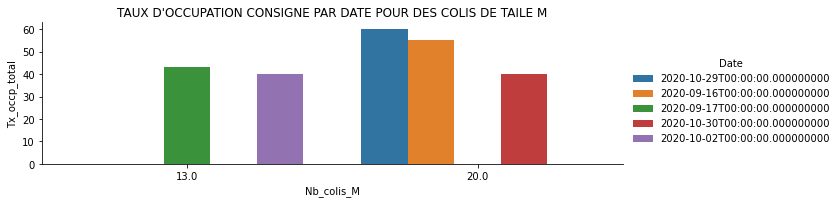

In [39]:
sns.catplot(x = "Nb_colis_M", y = "Tx_occp_total",  kind = "bar", hue = "Date", orient  = "v",
            data = A_max.head(),height=2.5, aspect = 3.5,
           legend_out = True)
plt.title("Taux d'occupation consigne par date pour des colis de taile M".upper())
plt.show()

#### Treatment time series ==> rendre la date en index

In [40]:
consigne.set_index(["Date"], inplace = True)
consigne.head(2)

,id_consigne,Nom du site,Nb casiers,Colis livrés,Total Casiers Indisponibles,Tx_occp_total,Casiers_S,Casiers_M,Casiers_L,Casiers_XL,Nb_colis_S,Nb_colis_M,Nb_colis_L,Nb_colis_XL,Casiers en Panne,Casiers Sales,Casiers Ouverts
Date,,,,,,,,,,,,,,,,,
2020-09-01,X0015,GARE DE EMERAINVILLE - PONTAULT COMBAULT,60,8,11,18.33,24.0,30.0,6.0,0.0,3.0,6.0,2.0,0.0,3,0,0
2020-09-01,X0015,GARE DE EMERAINVILLE - PONTAULT COMBAULT,60,8,11,18.33,24.0,30.0,6.0,0.0,3.0,6.0,2.0,0.0,3,0,0


#### Variation des types de colis (tailles)  en consigne par jour

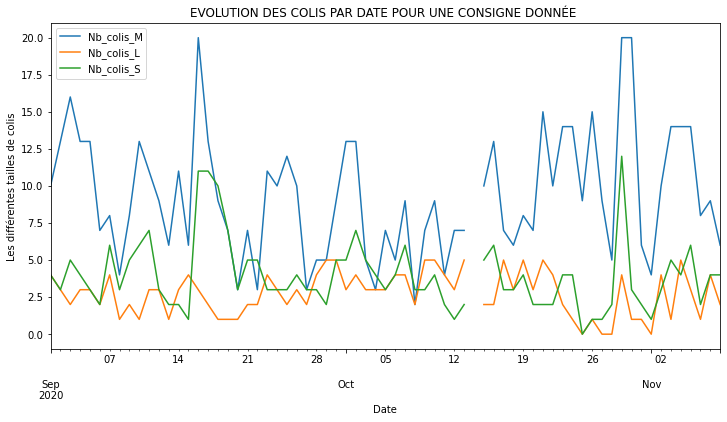

In [41]:
plt.figure(figsize = (12,6)) 
#fig.set_size_inches(12,6)

consigne["Nb_colis_M"].resample("D").max().plot()
consigne["Nb_colis_L"].resample("D").max().plot()
consigne["Nb_colis_S"].resample("D").max().plot()

plt.title("Evolution des colis par date pour une consigne donnée ".upper())
plt.ylabel("Les différentes tailles de colis")
plt.legend()

plt.show()

    Cette consigne est beaucoup plus livrée avec des colis de taille M, 
    Il est donc préférable que cette consigne ait beaucoup plus de casiers de tailles M, 
    puisqu'il semble évident qu'elle est beaucoup plus livrée par des colis de taille M 
    ==> du moins pendant notre période d'étude

In [42]:
max_valeurs = consigne.resample("D").max()
max_valeurs.head(3)

,id_consigne,Nom du site,Nb casiers,Colis livrés,Total Casiers Indisponibles,Tx_occp_total,Casiers_S,Casiers_M,Casiers_L,Casiers_XL,Nb_colis_S,Nb_colis_M,Nb_colis_L,Nb_colis_XL,Casiers en Panne,Casiers Sales,Casiers Ouverts
Date,,,,,,,,,,,,,,,,,
2020-09-01,X0015,GARE DE EMERAINVILLE - PONTAULT COMBAULT,60.0,15.0,18.0,30.00,24.0,30.0,6.0,0.0,4.0,10.0,4.0,0.0,3.0,0.0,0.0
2020-09-02,X0015,GARE DE EMERAINVILLE - PONTAULT COMBAULT,60.0,15.0,19.0,31.67,24.0,30.0,6.0,0.0,3.0,13.0,3.0,0.0,4.0,0.0,0.0
2020-09-03,X0015,GARE DE EMERAINVILLE - PONTAULT COMBAULT,60.0,22.0,22.0,36.67,24.0,30.0,6.0,0.0,5.0,16.0,2.0,0.0,1.0,0.0,0.0


### Variation du Tx d'occupation de la consigne en fonction du nb des colis

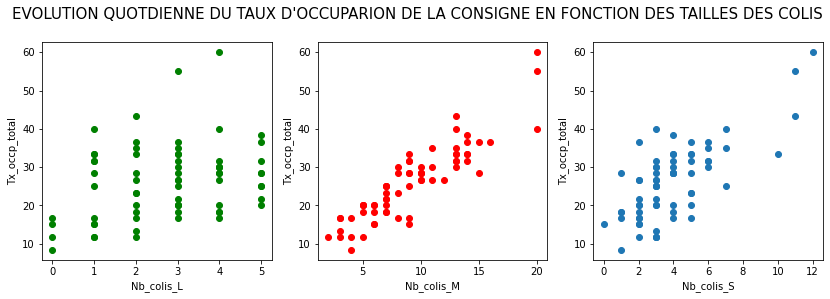

In [43]:
plt.figure(figsize = (14,4))

plt.subplot(1, 3, 1)
plt.scatter(x ="Nb_colis_L" , y= "Tx_occp_total", data = max_valeurs, c = "green")
plt.xlabel("Nb_colis_L")
plt.ylabel("Tx_occp_total")

plt.subplot(1, 3, 2)
plt.scatter(x ="Nb_colis_M" , y= "Tx_occp_total", data = max_valeurs, c = "red")
plt.xlabel("Nb_colis_M")
plt.ylabel("Tx_occp_total")

plt.subplot(1, 3, 3)
plt.scatter(x ="Nb_colis_S" , y= "Tx_occp_total", data = max_valeurs)
plt.xlabel("Nb_colis_S")
plt.ylabel("Tx_occp_total")

plt.title("EVOLUTION QUOTDIENNE DU TAUX D'OCCUPARION DE LA CONSIGNE EN FONCTION DES TAILLES DES COLIS\n", 
          loc = "right", fontsize = "15")
plt.show()

In [44]:
mois_evolution =  consigne.resample("M").max()
mois_evolution

,id_consigne,Nom du site,Nb casiers,Colis livrés,Total Casiers Indisponibles,Tx_occp_total,Casiers_S,Casiers_M,Casiers_L,Casiers_XL,Nb_colis_S,Nb_colis_M,Nb_colis_L,Nb_colis_XL,Casiers en Panne,Casiers Sales,Casiers Ouverts
Date,,,,,,,,,,,,,,,,,
2020-09-30,X0015,GARE DE EMERAINVILLE - PONTAULT COMBAULT,60,32,33,55.00,24.0,30.0,6.0,0.0,11.0,20.0,5.0,0.0,4,0,1
2020-10-31,X0015,GARE DE EMERAINVILLE - PONTAULT COMBAULT,60,36,36,60.00,24.0,30.0,6.0,0.0,12.0,20.0,5.0,0.0,3,0,1
2020-11-30,X0015,GARE DE EMERAINVILLE - PONTAULT COMBAULT,60,22,23,38.33,24.0,30.0,6.0,0.0,6.0,14.0,5.0,0.0,2,0,0


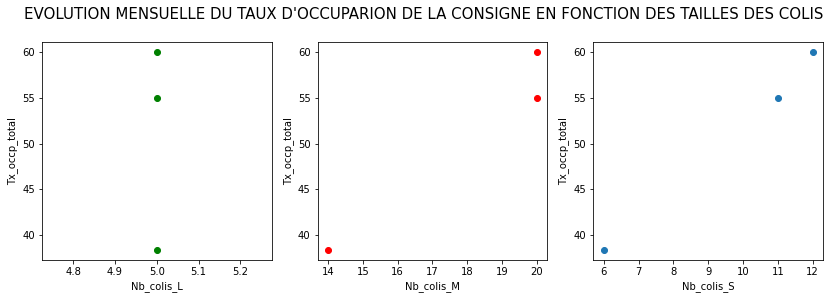

In [45]:
plt.figure(figsize = (14,4))

plt.subplot(1, 3, 1)
plt.scatter(x ="Nb_colis_L" , y= "Tx_occp_total", data = mois_evolution, c = "green")
plt.xlabel("Nb_colis_L")
plt.ylabel("Tx_occp_total")

plt.subplot(1, 3, 2)
plt.scatter(x ="Nb_colis_M" , y= "Tx_occp_total", data = mois_evolution, c = "red")
plt.xlabel("Nb_colis_M")
plt.ylabel("Tx_occp_total")

plt.subplot(1, 3, 3)
plt.scatter(x ="Nb_colis_S" , y= "Tx_occp_total", data = mois_evolution)
plt.xlabel("Nb_colis_S")
plt.ylabel("Tx_occp_total")

plt.title("EVOLUTION MENSUELLE DU TAUX D'OCCUPARION DE LA CONSIGNE EN FONCTION DES TAILLES DES COLIS\n", 
          loc = "right", fontsize = "15")
plt.show()

    Nus n'avons des données que sur 3 mois et donc définir une tendance n'est pas évidente, toutefois nous  allons 
    sous entendre que le taux d'occupation de la consigne varie bien de façon linéaire avec le nombre de colis au global
    Ainsi nous effectuerons une regression linaire multiple afin de ressortir  la fonction y = aL + bM + cS + dXL 
    où L,M,S,XL sont en effet les tailles des casiers (et donc des colis)

    Rappelons qu'il n'est +/- possible de juger de la taille d'un colis qu'une fois en consigne , raison de notre premier modèle de prédiction de la taille des colis

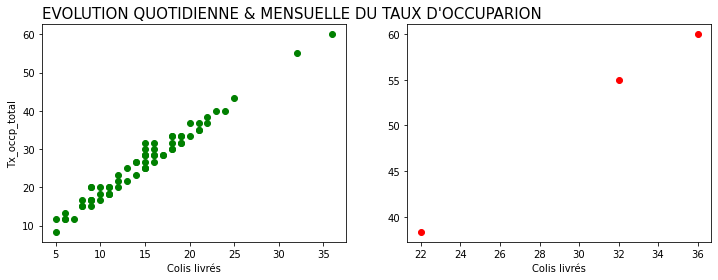

In [46]:
plt.figure(figsize= (12,4))

plt.subplot(1,2,2)
plt.scatter(x= "Colis livrés", y = "Tx_occp_total", data = mois_evolution, c = "red")
plt.xlabel("Colis livrés")

plt.subplot(1,2,1)
plt.scatter(x= "Colis livrés", y = "Tx_occp_total", data = max_valeurs, c= "green")
plt.xlabel("Colis livrés")
plt.ylabel("Tx_occp_total")

plt.title("EVOLUTION QUOTIDIENNE & MENSUELLE DU TAUX D'OCCUPARION", loc = "left", fontsize = "15")
plt.show()

# 3' - DEDUCTION DE LA CONFIGURATION GENERALE DES COLIS EN CONSIGNES

    iL EST EN EFFET POSSIBLE DE LE FAIRE PAR UNE METHODE PUREMENT 
    STATISTIQUE EN PRENANT SIMPLEMENT LA MOYENNE DES COLIS EN CONSIGNE
  ##### Method_stats_1 : Moyenne des valeurs sans tenir compte de la période

In [47]:
config_stats_consigne = consigne.mean()
config_stats_consigne = config_stats_consigne.transform(lambda x: round(x,0))
config_stats_consigne

Nb casiers                     60.0
Colis livrés                    9.0
Total Casiers Indisponibles    10.0
Tx_occp_total                  17.0
Casiers_S                      24.0
Casiers_M                      30.0
Casiers_L                       6.0
Casiers_XL                      0.0
Nb_colis_S                      3.0
Nb_colis_M                      6.0
Nb_colis_L                      2.0
Nb_colis_XL                     0.0
Casiers en Panne                1.0
Casiers Sales                   0.0
Casiers Ouverts                 0.0
dtype: float64

####  ==>  Les colis dans  cette consigne seraient donc de la forme 3S + 6M + 2L + 0XL  avec un TX d'occupation de 17%

 ##### Method_stats_2 :  La moyenne des Moyenne mensuelle 

In [48]:
config_stats_consigne = consigne.resample("M").mean()
config_stats_consigne = config_stats_consigne.iloc[:, [3,8,9,10,11]]
config_stats_consigne = config_stats_consigne.transform(lambda x: round(x,0))
config_stats_consigne

,Tx_occp_total,Nb_colis_S,Nb_colis_M,Nb_colis_L,Nb_colis_XL
Date,,,,,
2020-09-30,17.0,3.0,5.0,2.0,0.0
2020-10-31,17.0,2.0,6.0,2.0,0.0
2020-11-30,19.0,3.0,8.0,1.0,0.0


In [49]:
mean_moy = config_stats_consigne.mean()
mean_moy = mean_moy.transform(lambda x: round(x,0))
mean_moy

Tx_occp_total    18.0
Nb_colis_S        3.0
Nb_colis_M        6.0
Nb_colis_L        2.0
Nb_colis_XL       0.0
dtype: float64

#### ===> Nous aurons cette fois une tendance de colis de type  3S + 6M + 2L + 0XL avec un Tx d'occupation de 18%

#### Method_stat_3 : Melageons cette fois-ci plusieurs paramètres statistiques (moyenne et maximum)

    Notons ici que nous n'avons que des données sur 3 mois et pour une logique personnelle il est préférable de 
    prendre la moyenne des maximums quotidiens (même logique utilisé pour les colis destinés en consigne.)

In [125]:
stats_full = consigne.resample("D").agg({"Tx_occp_total" : "max", 
                                         "Nb_colis_S": "mean",
                                         "Nb_colis_M": "mean",
                                         "Nb_colis_L": "mean",
                                         "Nb_colis_XL": "mean"
                                        })

stats_full = stats_full.mean()
stats_full =stats_full.transform(lambda x: round(x,0))
stats_full

Tx_occp_total    26.0
Nb_colis_S        3.0
Nb_colis_M        6.0
Nb_colis_L        2.0
Nb_colis_XL       0.0
dtype: float64

In [126]:
stats_full2 = consigne.resample("D").agg({"Tx_occp_total" : "max", 
                                         "Nb_colis_S": "max",
                                         "Nb_colis_M": "max",
                                         "Nb_colis_L": "max",
                                         "Nb_colis_XL": "max"
                                        })

stats_full2 = stats_full2.mean()
stats_full2 =stats_full2.transform(lambda x: round(x,0))
stats_full2

Tx_occp_total    26.0
Nb_colis_S        4.0
Nb_colis_M        9.0
Nb_colis_L        3.0
Nb_colis_XL       0.0
dtype: float64

In [131]:
print("Ecart type1 {:.2f} ".format(stats_full.std()), "\nEcart type2 {:.2f} ".format(stats_full2.std()) )

Ecart type1 10.62  
Ecart type2 10.36 


### Ecart Type par rapport au max des colis jour

In [156]:
for i in ["L", "M", "S", "XL"] :
    A = [print("Ecart type1 {}".format(i), 
         round (consigne.resample("D").agg({ 
                                         "Nb_colis_{}".format(i): "max",
                                        }).std(),1)
         )]
 

Ecart type1 L Nb_colis_L    1.5
dtype: float64
Ecart type1 M Nb_colis_M    4.2
dtype: float64
Ecart type1 S Nb_colis_S    2.4
dtype: float64
Ecart type1 XL Nb_colis_XL    0.0
dtype: float64


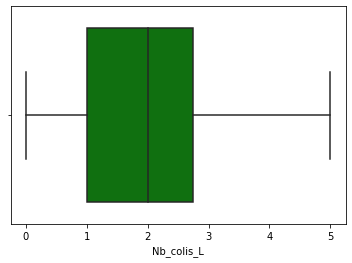

In [146]:
   L= sns.boxplot(x=consigne["Nb_colis_L"], color = "green")

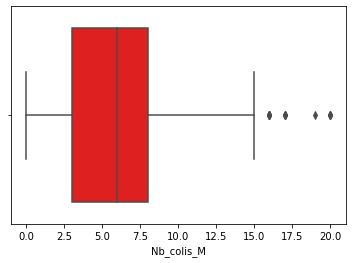

In [147]:
 M= sns.boxplot(x=consigne["Nb_colis_M"], color = "red")

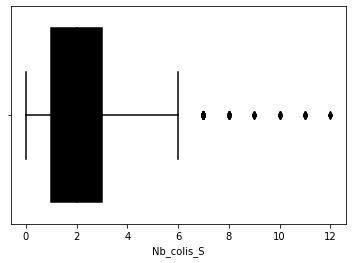

In [148]:
S= sns.boxplot(x=consigne["Nb_colis_S"], color = "black")

### Ecart Type par rapport àla moyenne 

In [158]:
for i in ["L", "M", "S", "XL"] :
    A = [print("Ecart type1 {}".format(i), 
         round (consigne.resample("D").agg({ 
                                         "Nb_colis_{}".format(i): "mean",
                                        }).std(),1)
         )]
 

Ecart type1 L Nb_colis_L    1.0
dtype: float64
Ecart type1 M Nb_colis_M    2.3
dtype: float64
Ecart type1 S Nb_colis_S    1.4
dtype: float64
Ecart type1 XL Nb_colis_XL    0.0
dtype: float64


###  Nous aurons donc pour : stats_full :  en moyenne une tendance journalière de colis 3S + 6M + 2L + 0XL  avec un Tx d'occupation max de 26%

### Ou pour stats_full2 ; une tendance maximale de  4S + 9M + 3L + 0XL  avec un Tx d'occupation max de 26%

## Method_4 : Regression linéaire afin de déduire le taux d'occupation d'une consigne en fonction des tailles de colis
Nous le ferons sur une consigne en prenant comme dataset les valeurs maximales quotidiennes de la consigne

In [53]:
dataset = consigne.resample("D").max()
dataset = dataset.loc[:,['id_consigne', 'Nb_colis_S', 'Nb_colis_M',
                                           'Nb_colis_L', 'Nb_colis_XL','Tx_occp_total']]
dataset.iloc[:,1:] = dataset.iloc[:,1:].transform(lambda x: round(x,))

print("Nb de valeurs manquantes : \n",dataset.isnull().sum())
dataset= dataset.dropna()
dataset.head(2)

Nb de valeurs manquantes : 
 id_consigne      1
Nb_colis_S       1
Nb_colis_M       1
Nb_colis_L       1
Nb_colis_XL      1
Tx_occp_total    1
dtype: int64


,id_consigne,Nb_colis_S,Nb_colis_M,Nb_colis_L,Nb_colis_XL,Tx_occp_total
Date,,,,,,
2020-09-01,X0015,4.0,10.0,4.0,0.0,30.0
2020-09-02,X0015,3.0,13.0,3.0,0.0,32.0


In [54]:
# features and target
X=dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test =sc.transform(X_test)

# training model 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
# for showing only 2 elements after comma, we have to convert y_pred in np.array before
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Model's Scoring

In [56]:
print("Score_train :", regressor.score(X_train, y_train))
print("Score_test :", regressor.score(X_test, y_test))

Score_train : 0.9934843711744783
Score_test : 0.9949351420424292


In [57]:
from sklearn.metrics import r2_score, adjusted_rand_score
r2_score(y_test, y_pred = regressor.predict(X_test))

print("r2_score  ==> {:.2f} %".format(r2_score(y_test, y_pred = regressor.predict(X_test))*100))

print("\n les coeff de l'équation de regression :", regressor.coef_,
                         "\nla constante : ",round(regressor.intercept_,2))

r2_score  ==> 99.49 %

 les coeff de l'équation de regression : [4.04521582 6.7703992  2.29545229 0.        ] 
la constante :  26.72


### Soit une représentation de la consigne du type y = 4S + 7M + 2L + 0XL + 26.72
## y = Tx occupation de la consigne ==> 39.72%

## Essayons sur une autre consigne 

In [ ]:
choisir = input("Entre le num id d'une consigne : ")
consigneX =Taille_colis_en_consigne[Taille_colis_en_consigne["id_consigne"] == choisir].reset_index()
consigneX = consigneX.drop("index", axis = 1)
consigneX.set_index(["Date"], inplace = True)
consigneX.head(2)

In [ ]:
datasetX = consigneX.resample("D").max()
datasetX = datasetX.loc[:,['id_consigne', 'Nb_colis_S', 'Nb_colis_M',
                                           'Nb_colis_L', 'Nb_colis_XL','Tx_occp_total']]
datasetX.iloc[:,1:] = datasetX.iloc[:,1:].transform(lambda x: round(x,))

print("Nb de valeurs manquantes : \n",datasetX.isnull().sum())
datasetX= datasetX.dropna()
datasetX.head(2)

In [60]:
# features and target
X=datasetX.iloc[:,1:-1].values
y = datasetX.iloc[:,-1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test =sc.transform(X_test)

# training model 
from sklearn.linear_model import LinearRegression
regressorX = LinearRegression()
regressorX.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressorX.predict(X_test)
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


# Scoring 
print("Score_train :", regressorX.score(X_train, y_train))
print("Score_test :", regressorX.score(X_test, y_test))

#R2
from sklearn.metrics import r2_score, adjusted_rand_score
r2_score(y_test, y_pred = regressorX.predict(X_test))

print("r2_score  ==> {:.2f} %".format(r2_score(y_test, y_pred = regressorX.predict(X_test))*100))

print("\n les coeff de l'équation de regression :", regressorX.coef_,
                         "\nla constante : ",round(regressorX.intercept_,2))

Score_train : 0.9944196938413116
Score_test : 0.9923068098803732
r2_score  ==> 99.23 %

 les coeff de l'équation de regression : [ 3.73215764 12.59134162  5.41536193  0.        ] 
la constante :  48.0


### verificication

In [61]:
verif = Taille_colis_en_consigne[Taille_colis_en_consigne["id_consigne"] == choisir]
verif.sort_values(by = "Tx_occp_total",ascending = False).head(3)

,Date,id_consigne,Nom du site,Nb casiers,Colis livrés,Total Casiers Indisponibles,Tx_occp_total,Casiers_S,Casiers_M,Casiers_L,Casiers_XL,Nb_colis_S,Nb_colis_M,Nb_colis_L,Nb_colis_XL,Casiers en Panne,Casiers Sales,Casiers Ouverts
545326,2020-10-30,X0030,GARE DE ARPAJON,48,44,44,91.67,8.0,30.0,10.0,0.0,7.0,28.0,9.0,0.0,0,0,0
476527,2020-10-23,X0030,GARE DE ARPAJON,48,41,42,87.50,8.0,30.0,10.0,0.0,4.0,29.0,9.0,0.0,1,0,0
555070,2020-10-31,X0030,GARE DE ARPAJON,48,40,40,83.33,8.0,30.0,10.0,0.0,7.0,25.0,8.0,0.0,0,0,0


# 4- COLIS DESTINES AUX CONSIGNES 

    Ici nous allons:
        -filtrer les colis qui sont destinés à aller en consigne
        -Prédire leurs tailles à partir des leurs dimensions graçce à notre modèle de classification 
        réalisé plus haut X_clf
        -Reconstruire notre dataset avec les tailles des colis (manipulation pandas, Dataframe)
        - Ressortir la tendance des colis arrivant en consigne (methode statistique ou Modèle de regression linéaire)

In [62]:
total_folder = "D:\FRANCE 20 MAI 2018\DATA SCIENCES\FULLSTACK_PROJECT\ATK\\QV092"
qv092 = os.chdir(total_folder)

### Lecture du fichier

In [63]:
QV = [file for file in os.listdir(total_folder) if file.startswith("QV092")]
print("les fichiers qui nous intéressent QV092", len(QV))
print("exemple : ", QV[0])

les fichiers qui nous intéressent QV092 7
exemple :  QV092_EXT_DEVOYES_CONSIGNE_2020_S36_20200901.csv


In [64]:
fn_date = lambda x : pd.datetime.strptime(x, "%d/%m/%Y")

In [65]:
for i, x in enumerate(QV) :
    if i == 0 :
        k =  pd.read_csv(x, engine = 'python', sep=",", header = 0, parse_dates=["DATE_ANALYSE"], date_parser = fn_date)
    elif i == 5 :
        break
    else  :
        k1 =  pd.read_csv(x, engine = 'python', sep=",", header = 0, parse_dates=["DATE_ANALYSE"], date_parser = fn_date)
        print(k1.shape) 
        k = k.append(k1, ignore_index = True)
k.shape
print("Nombre de lignes :", k.shape[0], "\nNombre de colonnes : ", k.shape[1])

<ipython-input-64-d257840af75b>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  fn_date = lambda x : pd.datetime.strptime(x, "%d/%m/%Y")


(306600, 18)
(321485, 18)
(330825, 18)
(655056, 18)
Nombre de lignes : 2160313 
Nombre de colonnes :  18


In [66]:
data = k.copy()
print("Nb de lignes :", data.shape[0], "\nNb de colonnes :", data.shape[1], "\n",data.columns)

Nb de lignes : 2160313 
Nb de colonnes : 18 
 Index(['ï»¿PUDO_ANALYSE', 'DATE_ANALYSE', 'ZIPCODE', 'CITY', 'TYPE',
       'FIRM_PARCEL_CARRIER', 'CARRIER_NAME', 'SHIPPER_GROUP_NAME',
       'PUDO_CIBLE', 'PUDO_REEL', 'ENCOURS', 'RAISON_REROUTAGE',
       'Is_Colocalise', 'WEIGHT_MAX', 'LENGTH', 'WIDTH', 'HEIGHT',
       'PRESTATION'],
      dtype='object')


### Not use

### Filtre / PUDO Cible 

In [67]:
# COMPARAISON PUDO CIBLE ET LES 404 CONSIGNES FIGURANT DANS ETAT DU PARC
print('FILTRE SUR PUDO_CIBLE')
X= data["PUDO_CIBLE"].unique()
Y =  configuration["id_consigne"].unique()  # fichier venant de etat_parc

data["PUDO_CIBLE"] = data["PUDO_CIBLE"].apply(lambda x: str(x).strip())
data["PUDO_CIBLE"] = data["PUDO_CIBLE"].apply(lambda x :  x if x in Y else "Non")
filtre_pudo_cible = data[data["PUDO_CIBLE"] != "Non"]

print("Nb transactions :" , filtre_pudo_cible.shape[0])
print("ID_CONSIGNE_UNIQUE : ", filtre_pudo_cible["PUDO_CIBLE"].nunique() )

filtre_pudo_cible = filtre_pudo_cible.rename(columns = {"FIRM_PARCEL_CARRIER" : "Num_colis"})
dataset_2 = filtre_pudo_cible.iloc[:, [1,5,8,13,14,16,15]]
dataset_2["WEIGHT_MAX"] = dataset_2["WEIGHT_MAX"].apply(lambda x : round(x/1000,2) ) # conversion poinds en kg

FILTRE SUR PUDO_CIBLE
Nb transactions : 1151221
ID_CONSIGNE_UNIQUE :  382


<ipython-input-67-e9c07e2f6663>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2["WEIGHT_MAX"] = dataset_2["WEIGHT_MAX"].apply(lambda x : round(x/1000,2) ) # conversion poinds en kg


# Colis destinés aux consignes

In [68]:
dataset_2 = dataset_2.drop_duplicates(subset = ["Num_colis"])
dataset_2.set_index("Num_colis", inplace = True)
dataset_2.index.name = None
dataset_2 = dataset_2.dropna()
#dataset_2 = dataset_2[(dataset_2["LENGTH"] != 0.0) & (dataset_2["HEIGHT"] != 0.0) & (dataset_2["WIDTH"] != 0.0) ]
print(dataset_2.shape)
dataset_2.head(3)

(425274, 6)


,DATE_ANALYSE,PUDO_CIBLE,WEIGHT_MAX,LENGTH,HEIGHT,WIDTH
6W01023054889,2020-08-21,X0093,1.79,43.0,24.0,32.0
6M17151968677,2020-08-04,X0019,0.36,39.0,4.0,38.0
XT348072945FR,2020-08-17,X0093,0.95,35.0,9.0,35.0


## 4-a : Déduction / Prédiction la taille de chaque colis 

In [69]:
# Mettons notre dataset sous la forme de X pour le soumetre au  modele de classification plus haut X_clf 
taille_deduite = dataset_2.iloc[:, 2:].values
taille_deduite = sc.transform(taille_deduite)
y_pred = X_clf.predict(taille_deduite)

In [70]:
taille_colis = pd.DataFrame(y_pred, columns = ["Taille_colis"])
print("Les Taille des colis prédites : ", taille_colis["Taille_colis"].unique())

dataset_2["taille_deduite"] = y_pred
print("nb colis L ====> {}".format(len(dataset_2[dataset_2["taille_deduite"] == "L"])), 
          "\nnb colis M  ====> {}:".format(len(dataset_2[dataset_2["taille_deduite"] == "M"])),
             "\nnb colis S  ====> {}".format(len(dataset_2[dataset_2["taille_deduite"] == "S"])))
dataset_2.head(3)

Les Taille des colis prédites :  ['L' 'S' 'M']
nb colis L ====> 358830 
nb colis M  ====> 22846: 
nb colis S  ====> 43598


,DATE_ANALYSE,PUDO_CIBLE,WEIGHT_MAX,LENGTH,HEIGHT,WIDTH,taille_deduite
6W01023054889,2020-08-21,X0093,1.79,43.0,24.0,32.0,L
6M17151968677,2020-08-04,X0019,0.36,39.0,4.0,38.0,S
XT348072945FR,2020-08-17,X0093,0.95,35.0,9.0,35.0,L


## 4-b Reconstruction du dataset avec les tailles des colis

In [71]:
reconstruction = dataset_2.reset_index()
reconstruction.head()

,index,DATE_ANALYSE,PUDO_CIBLE,WEIGHT_MAX,LENGTH,HEIGHT,WIDTH,taille_deduite
0,6W01023054889,2020-08-21,X0093,1.79,43.0,24.0,32.0,L
1,6M17151968677,2020-08-04,X0019,0.36,39.0,4.0,38.0,S
2,XT348072945FR,2020-08-17,X0093,0.95,35.0,9.0,35.0,L
3,6M17594134783,2020-08-07,X0093,0.96,39.0,14.0,16.0,L
4,6W01016825694,2020-08-27,X0093,1.88,52.0,16.0,33.0,L


### Group par jour/ consigne/ taille de colis
Nb colis par taille en consigne par jour 

In [72]:
group_T = pd.DataFrame(reconstruction.groupby(["DATE_ANALYSE", "PUDO_CIBLE",
                                               "taille_deduite"])["index"].count().reset_index())
group_T.head()

,DATE_ANALYSE,PUDO_CIBLE,taille_deduite,index
0,2020-07-28,FR50091,L,10
1,2020-07-28,FR50091,S,1
2,2020-07-28,FR50142,L,19
3,2020-07-28,FR50142,M,1
4,2020-07-28,FR50143,L,19


In [73]:
group_T["index"] = group_T["index"].astype(str)
group_T["taille_colis"] = group_T["index"] + group_T["taille_deduite"]

In [74]:
group_T.head()

,DATE_ANALYSE,PUDO_CIBLE,taille_deduite,index,taille_colis
0,2020-07-28,FR50091,L,10,10L
1,2020-07-28,FR50091,S,1,1S
2,2020-07-28,FR50142,L,19,19L
3,2020-07-28,FR50142,M,1,1M
4,2020-07-28,FR50143,L,19,19L


In [75]:
group_T["colis_L"] = group_T["taille_colis"].apply(lambda x :  x[:-1] if x.endswith("L") else "0")
group_T["colis_M"] = group_T["taille_colis"].apply(lambda x :  x[:-1] if x.endswith("M") else "0")
group_T["colis_S"] = group_T["taille_colis"].apply(lambda x :  x[:-1] if x.endswith("S") else "0")
group_T["colis_XL"] = group_T["taille_colis"].apply(lambda x :  x[:-1] if x.endswith("XL") else "0")

##### Not use

In [76]:
group_T.head()

,DATE_ANALYSE,PUDO_CIBLE,taille_deduite,index,taille_colis,colis_L,colis_M,colis_S,colis_XL
0,2020-07-28,FR50091,L,10,10L,10,0,0,0
1,2020-07-28,FR50091,S,1,1S,0,0,1,0
2,2020-07-28,FR50142,L,19,19L,19,0,0,0
3,2020-07-28,FR50142,M,1,1M,0,1,0,0
4,2020-07-28,FR50143,L,19,19L,19,0,0,0


In [77]:
group_T.dtypes

DATE_ANALYSE      datetime64[ns]
PUDO_CIBLE                object
taille_deduite            object
index                     object
taille_colis              object
colis_L                   object
colis_M                   object
colis_S                   object
colis_XL                  object
dtype: object

### Image des consignes par jour 

In [78]:
construction_T = group_T.assign(count=1).groupby(["DATE_ANALYSE", "PUDO_CIBLE",
                                               ]).agg({'count':'sum',
                                                'index':lambda x : '+'.join(set(x)),
                                             'taille_colis':lambda x : '+'.join(set(x)),
                                                   "colis_L" : lambda x : '+'.join(set(x)),
                                                       "colis_M" : lambda x : '+'.join(set(x)),
                                                       "colis_S" : lambda x : '+'.join(set(x)),
                                                       "colis_XL" : lambda x : '+'.join(set(x)),
                             'taille_deduite':lambda x : '+'.join(set(x))}).reset_index()

print(construction_T.shape)
print(construction_T["PUDO_CIBLE"].nunique(), "Consignes")
construction_T.head(7)

(25046, 10)
382 Consignes


,DATE_ANALYSE,PUDO_CIBLE,count,index,taille_colis,colis_L,colis_M,colis_S,colis_XL,taille_deduite
0,2020-07-28,FR50091,2,10+1,10L+1S,10+0,0,0+1,0,L+S
1,2020-07-28,FR50142,2,19+1,1M+19L,19+0,0+1,0,0,L+M
2,2020-07-28,FR50143,3,19+5+1,5S+1M+19L,19+0,0+1,5+0,0,L+M+S
3,2020-07-28,FR50526,2,5+8,5S+8L,0+8,0,5+0,0,L+S
4,2020-07-28,FR50527,3,9+1,9L+1M+1S,9+0,0+1,0+1,0,L+M+S
5,2020-07-28,FR50528,2,4+1,4L+1S,4+0,0,0+1,0,L+S
6,2020-07-28,FR50529,3,3+2+14,2M+14L+3S,0+14,2+0,3+0,0,L+M+S


#### FONCTION CONVERTION STRING + ADDITION INTEGER

In [79]:
def entier(x) :
    x = x.replace("+", " ").split()
    s = 0
    for i in x :
        i = int(i)
        s = s + i
    return s

In [80]:
entier("3+78")

81

In [81]:
construction_T["colis_L"] = construction_T["colis_L"].apply(lambda x : entier(x))
construction_T["colis_M"] = construction_T["colis_M"].apply(lambda x : entier(x))
construction_T["colis_S"] = construction_T["colis_S"].apply(lambda x : entier(x))
construction_T["colis_XL"] = construction_T["colis_XL"].apply(lambda x : entier(x))

In [82]:
construction_T.head()

,DATE_ANALYSE,PUDO_CIBLE,count,index,taille_colis,colis_L,colis_M,colis_S,colis_XL,taille_deduite
0,2020-07-28,FR50091,2,10+1,10L+1S,10,0,1,0,L+S
1,2020-07-28,FR50142,2,19+1,1M+19L,19,1,0,0,L+M
2,2020-07-28,FR50143,3,19+5+1,5S+1M+19L,19,1,5,0,L+M+S
3,2020-07-28,FR50526,2,5+8,5S+8L,8,0,5,0,L+S
4,2020-07-28,FR50527,3,9+1,9L+1M+1S,9,1,1,0,L+M+S


## Reconstruction d'une consigne

In [83]:
liste_consigne = reconstruction["PUDO_CIBLE"].unique()
consigne_0 = construction_T[construction_T["PUDO_CIBLE"]== liste_consigne[55]]

In [84]:
print(consigne_0.shape)
consigne_0.head()

(82, 10)


,DATE_ANALYSE,PUDO_CIBLE,count,index,taille_colis,colis_L,colis_M,colis_S,colis_XL,taille_deduite
49,2020-07-28,X0005,3,2+4+1,4L+1M+2S,4,1,2,0,L+M+S
379,2020-07-29,X0005,3,30+3+4,4S+30L+3M,30,3,4,0,L+M+S
705,2020-07-30,X0005,3,22+1,22L+1S+1M,22,1,1,0,L+M+S
1028,2020-07-31,X0005,3,17+1,1M+17L+1S,17,1,1,0,L+M+S
1336,2020-08-01,X0005,2,4+1,4L+1S,4,0,1,0,L+S


In [85]:
consigne_0["DATE_ANALYSE"].max() - consigne_0["DATE_ANALYSE"].min()

Timedelta('95 days 00:00:00')

## 4-c La tendance des colis destinés aux consignes (déduction statistique)

    Nous retiendrons le maximum des colis par jour pour être plus optimal vu la période des données.
    ainsi nous aurons la capacité moyenne et maximale  à laquelle travaille chaque types de casiers 
    (selon la période de notre étude)

In [86]:
consigne_0 = consigne_0.iloc[:, [0,1,5,6,7,8]]
consigne_0.set_index("DATE_ANALYSE", inplace = True)
consigne_0 = consigne_0.resample("D").max()
consigne_0.head()

,PUDO_CIBLE,colis_L,colis_M,colis_S,colis_XL
DATE_ANALYSE,,,,,
2020-07-28,X0005,4.0,1.0,2.0,0.0
2020-07-29,X0005,30.0,3.0,4.0,0.0
2020-07-30,X0005,22.0,1.0,1.0,0.0
2020-07-31,X0005,17.0,1.0,1.0,0.0
2020-08-01,X0005,4.0,0.0,1.0,0.0


### Soit que les colis arrivent à ce point sous la forme ci-dessous  par  jour 

In [87]:
Cons_Cible = pd.DataFrame(consigne_0.resample("D").max().max()).T
L = round(Cons_Cible["colis_L"],0)
M = round(Cons_Cible["colis_M"],0)
S = round(Cons_Cible["colis_S"],0)
XL = round(Cons_Cible["colis_XL"],0)
print(set(L),"L +",set(M),"M +",set(S),"S +",set(XL),"XL")

{36.0} L + {4.0} M + {7.0} S + {0.0} XL


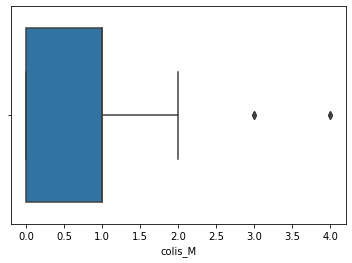

In [88]:
a = sns.boxplot(x=consigne_0["colis_M"])


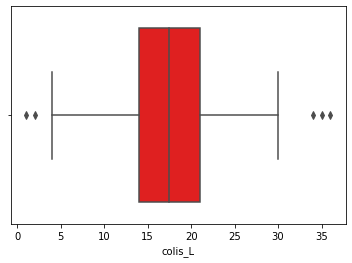

In [89]:
b = sns.boxplot(x=consigne_0["colis_L"], color = "red")


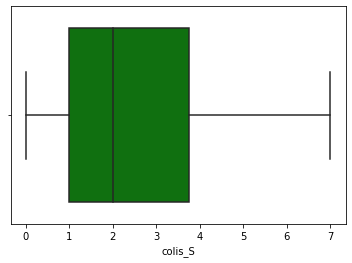

In [90]:
c= sns.boxplot(x=consigne_0["colis_S"], color = "green")

# 5 - @webapp

# Stockage Modèle de ML  XGBOOST en fichier pickled ==>.pkl

In [91]:
import joblib
joblib.dump(X_clf, "Prediction_taille.pkl")

['Prediction_taille.pkl']

# rappeller le modele déjà entraîné dansVS CODE 

In [92]:
Model_prediction = joblib.load("Prediction_taille.pkl")

### Le Programme de prédiction et de reconstitution  des Fichiers

In [93]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()

In [94]:
print("Colonnes obligatoires du fichier : date_livraison / poids / longueur / largeur / hauteur".upper())

Download_files = input(
"Entrez le chemin complet du fichier avec l'extension  .xls ou .xlsx ou .csv \nExemple c:/cheinfichier/nom_fichier.csv : ")

print("sachant que la 1ere colonne de votre fichier c'est le rang 1 : ".upper())
pos_date = int(input("Entrez le rang de la colonne date : "))
pos_date = pos_date-1

pos_poids = int(input("Entrez le rang de la colonne poids : "))
pos_poids = pos_poids -1

pos_long = int (input("Entrez le rang de la colonne longueur : "))
pos_long = pos_long -1

pos_larg =  int(input("Entrez le rang de la colonne largeur : "))
pos_larg =  - 1

pos_haut = int( input("Entrez le rang de la colonne hauteur : "))
pos_haut =  -1


if Download_files.endswith("csv") :
    file = pd.read_csv(Download_files, sep= ";")
    file = file.iloc[:, [(pos_date-1), (pos_poids-1), (pos_long-1), (pos_larg-1),( pos_haut-1)]]
    X = file.iloc[:,1:].values
    X = Sc.fit_transform(X)
    file["les_tailles"] = Model_prediction.predict(X)
    
else :
    file = pd.read_excel(Download_files)
    file = file.iloc[:, [pos_date, pos_poids, pos_long, pos_larg, pos_haut]]
    X = file.iloc[:,1:].values
    X = Sc.fit_transform(X)
    file["les_tailles"] = Model_prediction.predict(X)

COLONNES OBLIGATOIRES DU FICHIER : DATE_LIVRAISON / POIDS / LONGUEUR / LARGEUR / HAUTEUR
Entrez le chemin complet du fichier avec l'extension  .xls ou .xlsx ou .csv 
Exemple c:/cheinfichier/nom_fichier.csv : D:\FRANCE 20 MAI 2018\DATA SCIENCES\FULLSTACK_PROJECT\ATK\fichier_plus_colonne.xlsx
SACHANT QUE LA 1ERE COLONNE DE VOTRE FICHIER C'EST LE RANG 1 : 
Entrez le rang de la colonne date : 2
Entrez le rang de la colonne poids : 6
Entrez le rang de la colonne longueur : 7
Entrez le rang de la colonne largeur : 8
Entrez le rang de la colonne hauteur : 9


#### Reconstruction fichier 

In [95]:
group_T = pd.DataFrame(file.groupby([file.columns[0], "les_tailles"])[file.columns[2]] .count().reset_index())
group_T[file.columns[2]] = group_T[file.columns[2]].astype(str)
group_T["taille_colis"] = group_T[file.columns[2]] + group_T["les_tailles"]


group_T["colis_L"] = group_T["taille_colis"].apply(lambda x :  x[:-1] if x.endswith("L") else "0")
group_T["colis_M"] = group_T["taille_colis"].apply(lambda x :  x[:-1] if x.endswith("M") else "0")
group_T["colis_S"] = group_T["taille_colis"].apply(lambda x :  x[:-1] if x.endswith("S") else "0")
group_T["colis_XL"] = group_T["taille_colis"].apply(lambda x :  x[:-1] if x.endswith("XL") else "0")



construction_T = group_T.assign(count=1).groupby([file.columns[0],
                                               ]).agg({'count':'sum',
                                                file.columns[2]:lambda x : '+'.join(set(x)),
                                             'taille_colis':lambda x : '+'.join(set(x)),
                                                   "colis_L" : lambda x : '+'.join(set(x)),
                                                       "colis_M" : lambda x : '+'.join(set(x)),
                                                       "colis_S" : lambda x : '+'.join(set(x)),
                                                       "colis_XL" : lambda x : '+'.join(set(x)),
                             'les_tailles':lambda x : '+'.join(set(x))}).reset_index()


construction_T.head(7)

,DATE_ANALYSE,count,LENGTH,taille_colis,colis_L,colis_M,colis_S,colis_XL,les_tailles
0,2020-09-08,2,1,1S+1L,0+1,0,0+1,0,L+S
1,2020-09-10,1,1,1S,0,0,1,0,S
2,2020-09-12,2,2+1,2M+1S,0,2+0,0+1,0,M+S
3,2020-09-15,1,3,3M,0,3,0,0,M
4,2020-09-16,2,3+1,1S+3M,0,3+0,0+1,0,M+S
5,2020-09-17,1,2,2M,0,2,0,0,M
6,2020-09-18,1,2,2L,2,0,0,0,L


In [96]:
def entier(x) :
    x = x.replace("+", " ").split()
    s = 0
    for i in x :
        i = int(i)
        s = s + i
    return s

#réecriture  colonnes
construction_T["colis_L"] = construction_T["colis_L"].apply(lambda x : entier(x))
construction_T["colis_M"] = construction_T["colis_M"].apply(lambda x : entier(x))
construction_T["colis_S"] = construction_T["colis_S"].apply(lambda x : entier(x))
construction_T["colis_XL"] = construction_T["colis_XL"].apply(lambda x : entier(x))


construction_T = construction_T.iloc[:, [0,4,5,6,7]]
construction_T.set_index(file.columns[0], inplace = True)
construction_T = construction_T.resample("D").max()
construction_T.head()

Cons_Cible = pd.DataFrame(construction_T.resample("D").max().max()).T
L = round(Cons_Cible["colis_L"],0)
M = round(Cons_Cible["colis_M"],0)
S = round(Cons_Cible["colis_S"],0)
XL = round(Cons_Cible["colis_XL"],0)
print("Max de colis re_u par jour : ", "\n",
    set(L),"Colis_L +",set(M),"Colis_M \n",set(S),"Colis_S +",set(XL),"Colis_XL",
      
     "\n\nDurant une  période allant du :  ", group_T[group_T.columns[0]].max(), "au", group_T[group_T.columns[0]].min(),
      "\nSoit un intervalle de", (group_T[group_T.columns[0]].max() - group_T[group_T.columns[0]].min()),
      "\nEt",group_T[group_T.columns[0]].nunique(),"jours uniques" )

Max de colis re_u par jour :  
 {2.0} Colis_L + {14.0} Colis_M 
 {2.0} Colis_S + {0.0} Colis_XL 

Durant une  période allant du :   2020-09-30 00:00:00 au 2020-09-08 00:00:00 
Soit un intervalle de 22 days 00:00:00 
Et 17 jours uniques


## Proposition de consigne 

In [97]:
def configuration_consigne() :
    question = input("Voulez vous un nombre de casiers bien définie Oui ou Non ? ")
    question = question.lower()
    
    while question == "oui" :
        
        print("en cours de recherche en fonction de la politique commerciale")
        question = input("Voulez vous un nombre de casiers bien définie Oui ou Non ? ")
     
    else :
        print( "Vous pouvez opter pour :")
        Nb_casiers_S = S
        Nb_casiers_M = M 
        Nb_casiers_L = L 
        Nb_casiers_XL = XL 
        Dico_config_consigne  = {
            "Nb_casiers_S" : set(Nb_casiers_S),
            "Nb_casiers_M" : set(Nb_casiers_M),
            "Nb_casiers_L": set(Nb_casiers_L),
            "Nb_casiers_XL" : set(Nb_casiers_XL)}
      
    return print(Dico_config_consigne)


In [98]:
configuration_consigne()

Voulez vous un nombre de casiers bien définie Oui ou Non ? OUI
en cours de recherche en fonction de la politique commerciale
Voulez vous un nombre de casiers bien définie Oui ou Non ? NON
Vous pouvez opter pour :
{'Nb_casiers_S': {2.0}, 'Nb_casiers_M': {14.0}, 'Nb_casiers_L': {2.0}, 'Nb_casiers_XL': {0.0}}
